## Imports

In [91]:
from scipy.optimize import minimize, SR1
from helpers import *

##  Newton-CG

In [92]:
def newton_cg_method(f, grad_f, x0, tol=1e-6, max_iter=1000):
    x = np.array(x0, dtype=float)
    x_history = [x.copy()]

    def callback(xk):
        x_history.append(xk.copy())

    result = minimize(
        f,
        x0,
        method='Newton-CG',
        jac=grad_f,
        tol=tol,
        options={'maxiter': max_iter},
        callback=callback
    )
    result['x_history'] = np.array(x_history)
    return result


##  quasi-Newton method

In [93]:
def sr1_method(f, grad_f, x0, tol=1e-6, max_iter=100):
    x_history = [np.array(x0)]

    def callback(xk, res=None):
        x_history.append(xk.copy())

    result = minimize(
        f,
        x0,
        method='trust-constr',
        jac=grad_f,
        tol=tol,
        hess=SR1(),
        options={'maxiter': max_iter},
        callback=callback
    )
    result['x_history'] = np.array(x_history)
    return result


## BFGS quasi-Newton method

In [94]:
def bfgs_method(f, grad_f, x0, tol=1e-6, max_iter=1000):
    x = np.array(x0, dtype=float)
    x_history = [x.copy()]

    def callback(xk):
        x_history.append(xk.copy())

    result = minimize(
        f,
        x0,
        method='BFGS',
        jac=grad_f,
        tol=tol,
        options={'maxiter': max_iter},
        callback=callback
    )
    result['x_history'] = np.array(x_history)
    return result


# 1. Rotated elliptical function

Method: Newton-CG SciPy Method
Initial point: [-3, -25]
Real minimum: [-18, 16]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-18.000, 16.000)       -208.000      3             16         0.000000  


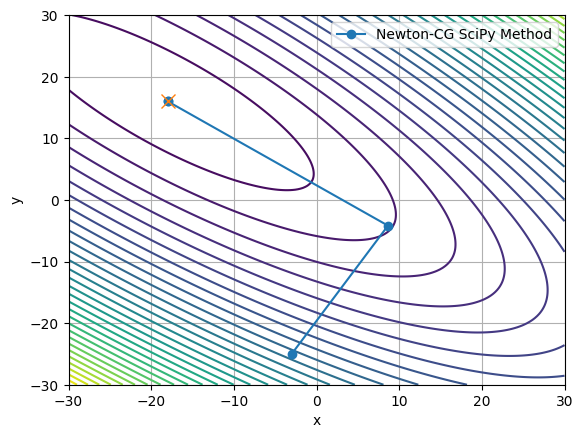

In [95]:
print_output([-3, -25], newton_cg_method, func_re, grad_re, [-18, 16], label="Newton-CG SciPy Method", grid=[-30, 30])

Method: SR1 SciPy Method
Initial point: [-3, -25]
Real minimum: [-18, 16]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-18.000, 16.000)       -208.000      4             8          0.000000  


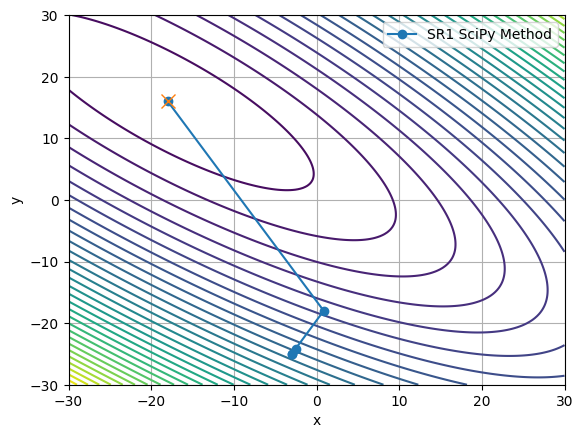

In [96]:
print_output([-3, -25], sr1_method, func_re, grad_re, [-18, 16], label="SR1 SciPy Method", grid=[-30, 30])

Method: BFGS SciPy Method
Initial point: [-3, -25]
Real minimum: [-18, 16]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-18.000, 16.000)       -208.000      6             16         0.000000  


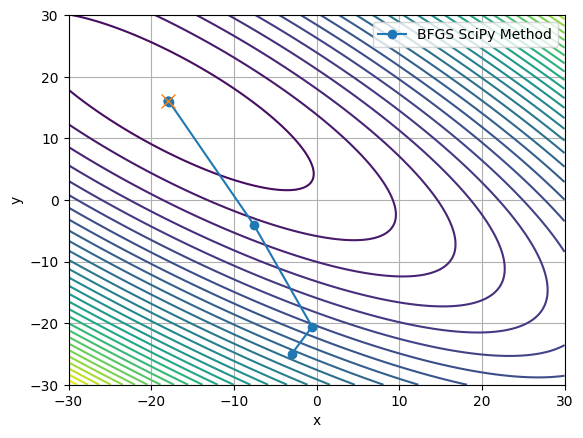

In [97]:
print_output([-3, -25], bfgs_method, func_re, grad_re, [-18, 16], label="BFGS SciPy Method", grid=[-30, 30])

# 2. Rosenbrock function

Method: Newton-CG SciPy Method
Initial point: [-5, 3]
Real minimum: [1, 1]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (1.000, 1.000)       0.000         494           2318       0.000000  


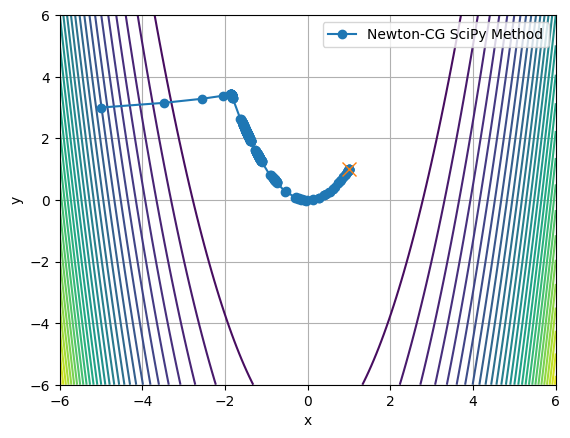

In [98]:
print_output([-5, 3], newton_cg_method, rosenbrock, grad_rosenbrock, [1, 1], label="Newton-CG SciPy Method")

Method: SR1 SciPy Method
Initial point: [-5, 3]
Real minimum: [1, 1]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-0.042, -0.008)       1.096         100           200        1.449983  


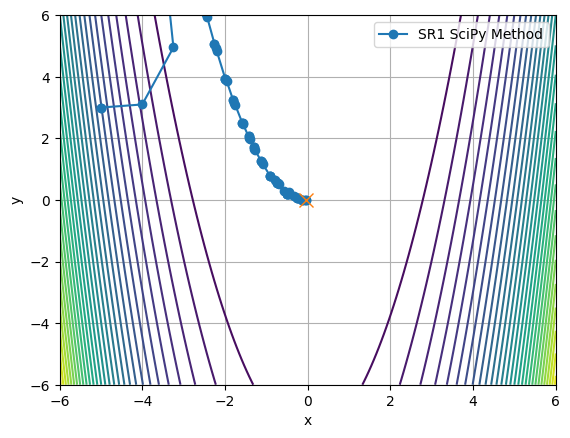

In [99]:
print_output([-5, 3], sr1_method, rosenbrock, grad_rosenbrock, [1, 1], label="SR1 SciPy Method")

Method: BFGS SciPy Method
Initial point: [-5, 3]
Real minimum: [1, 1]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (1.000, 1.000)       0.000         69            180        0.000000  


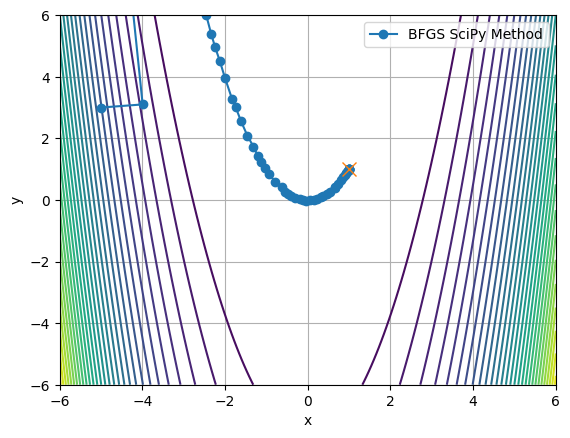

In [100]:
print_output([-5, 3], bfgs_method, rosenbrock, grad_rosenbrock, [1, 1], label="BFGS SciPy Method")


# 3. Himmelblau function

Method: Newton-CG SciPy Method
Initial point: [-5, 3]
Known minima: [[3, 2], [-2.805118, 3.131312], [-3.77931, -3.283186], [3.584428, -1.848126]]
Closest minimum: [-2.805118, 3.131312]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-3.138, 2.030)       36.961        2             87         1.150250  


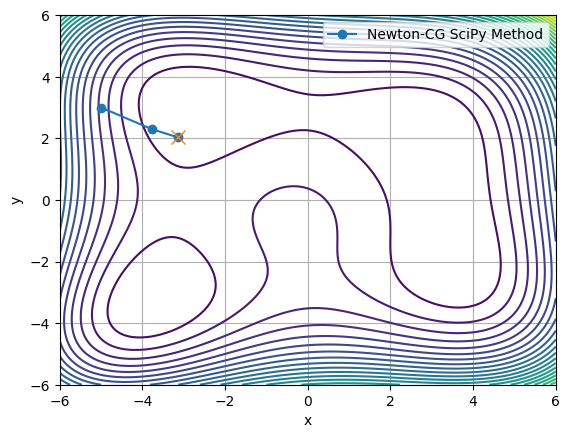

In [101]:
himmelblau_minima = [
    [3, 2],
    [-2.805118, 3.131312],
    [-3.779310, -3.283186],
    [3.584428, -1.848126]
]

print_output_multi_minima([-5, 3], newton_cg_method, himmelblau, grad_himmelblau,
                          himmelblau_minima, label="Newton-CG SciPy Method")

Method: SR1 SciPy Method
Initial point: [-5, 3]
Known minima: [[3, 2], [-2.805118, 3.131312], [-3.77931, -3.283186], [3.584428, -1.848126]]
Closest minimum: [-2.805118, 3.131312]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-2.805, 3.131)       0.000         23            46         0.000001  


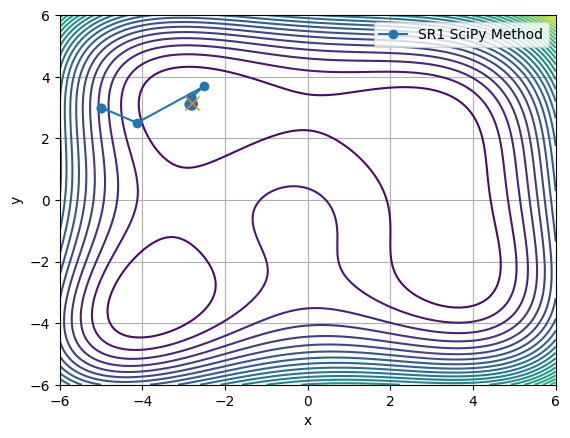

In [102]:
himmelblau_minima = [
    [3, 2],
    [-2.805118, 3.131312],
    [-3.779310, -3.283186],
    [3.584428, -1.848126]
]

print_output_multi_minima([-5, 3], sr1_method, himmelblau, grad_himmelblau,
                          himmelblau_minima, label="SR1 SciPy Method")

Method: BFGS SciPy Method
Initial point: [-5, 3]
Known minima: [[3, 2], [-2.805118, 3.131312], [-3.77931, -3.283186], [3.584428, -1.848126]]
Closest minimum: [-2.805118, 3.131312]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-4.085, 2.553)       88.778        2             112        1.404479  


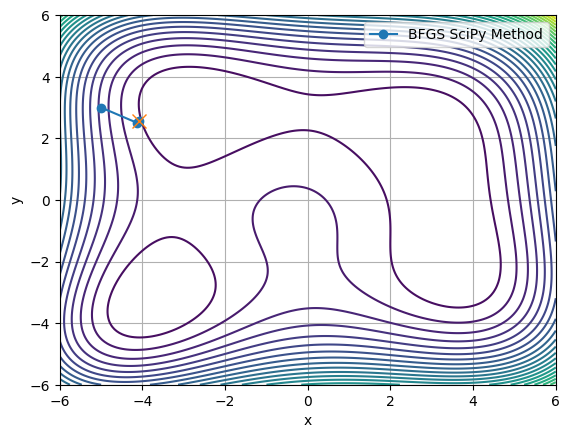

In [103]:
himmelblau_minima = [
    [3, 2],
    [-2.805118, 3.131312],
    [-3.779310, -3.283186],
    [3.584428, -1.848126]
]

print_output_multi_minima([-5, 3], bfgs_method, himmelblau, grad_himmelblau,
                          himmelblau_minima, label="BFGS SciPy Method")

# 4. Bukin function N 6

Method: Newton-CG SciPy Method
Initial point: [4, 4]
Real minimum: [-10, 0]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-12.516, -0.211)       133.360       1             113        2.525218  


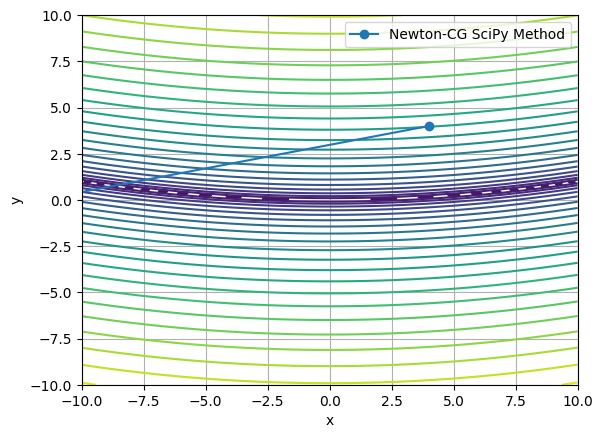

In [104]:
print_output([4, 4], newton_cg_method, bukin, grad_bukin, [-10, 0], label="Newton-CG SciPy Method", grid=[-10, 10])

Method: SR1 SciPy Method
Initial point: [4, 4]
Real minimum: [-10, 0]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-6.398, 0.405)       6.975         37            74         3.624291  


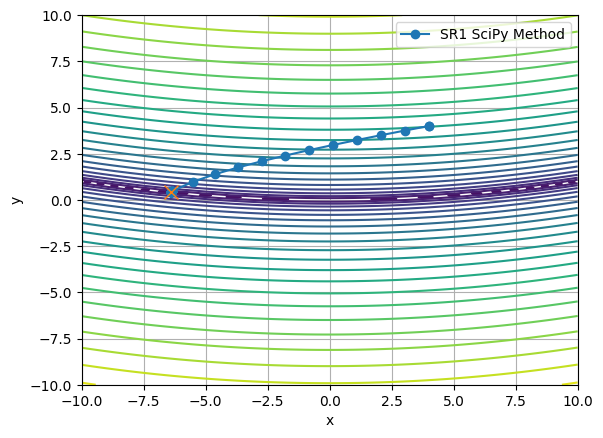

In [105]:
print_output([4, 4], sr1_method, bukin, grad_bukin, [-10, 0], label="SR1 SciPy Method", grid=[-10, 10])

Method: BFGS SciPy Method
Initial point: [4, 4]
Real minimum: [-10, 0]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (-11.183, 0.129)       105.923       1             124        1.189732  


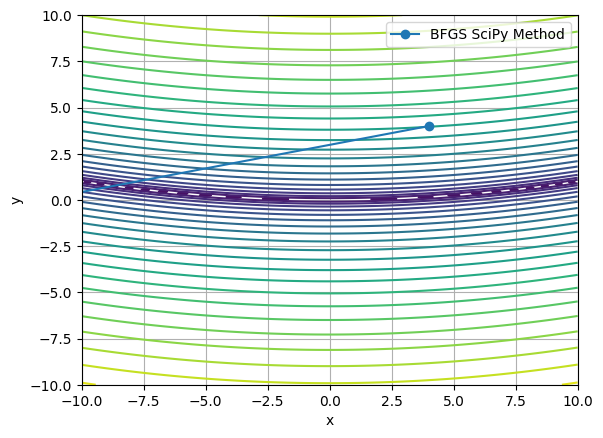

In [106]:
print_output([4, 4], bfgs_method, bukin, grad_bukin, [-10, 0], label="BFGS SciPy Method", grid=[-10, 10])


# 5. Rastrigin function


Method: Newton-CG SciPy Method
Initial point: [4, 4]
Real minimum: [0, 0]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (0.951, 0.951)       1.903         7             37         1.344989  


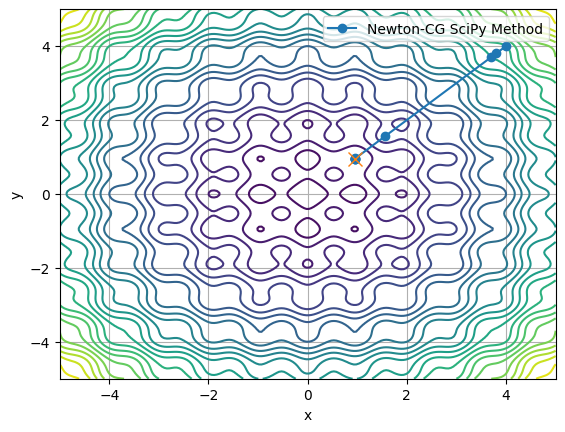

In [107]:
print_output([4, 4], newton_cg_method, rastrigin, grad_rastrigin, [0, 0], label="Newton-CG SciPy Method", grid=[-5, 5])

Method: SR1 SciPy Method
Initial point: [4, 4]
Real minimum: [0, 0]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (1.897, 1.897)       7.602         8             16         2.682523  


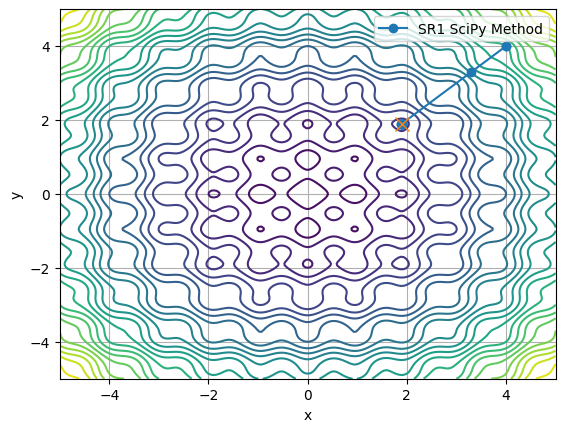

In [108]:
print_output([4, 4], sr1_method, rastrigin, grad_rastrigin, [0, 0], label="SR1 SciPy Method", grid=[-5, 5])

Method: BFGS SciPy Method
Initial point: [4, 4]
Real minimum: [0, 0]
Method          Found point          f(x)       Iterations      Evals        Error     
------------------------------------------------------------------------------------------
Stat            (0.000, 0.000)       0.000         5             20         0.000000  


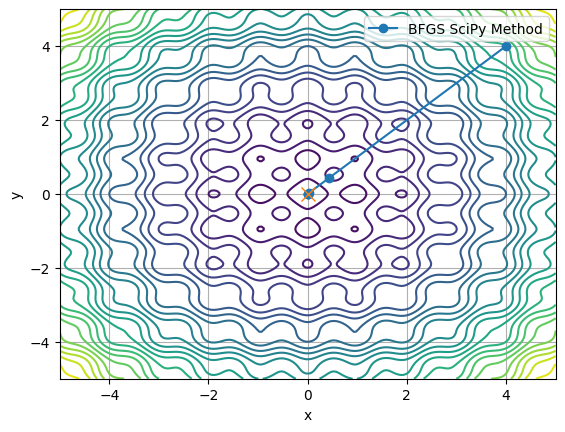

In [109]:
print_output([4, 4], bfgs_method, rastrigin, grad_rastrigin, [0, 0], label="BFGS SciPy Method", grid=[-5, 5])